In [6]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
from PIL import Image

pp = pprint.PrettyPrinter(indent=4)

In [8]:
def load_data(image_dir, label_file,  target_size):
    #Takes in str, str, tuple
    #Returns a tuple with:
    # Numpy array of image (N, target_size[1], target_size[0], channels)
    # Numpy array of labels N
    # Numpy array of filename N

    images = []
    labels = []
    filenames = []
    image_labels = {}

    with open(label_file, 'r') as f:
        for line in f:
            image_id, label = line.strip().split(',')
            image_labels[image_id + ".png"] = int(label)
    
    for filename, label in image_labels.items():
        image_path = os.path.join(image_dir, filename)

        try:
            img = Image.open(image_path).convert('RGB') #Make sure its RGB
            img = img.resize(target_size)

            img_arr = np.array(img)

            images.append(img_arr)
            labels.append(label)
            filenames.append(filename)

        
        except: 
            print(f"Received exception in load_data while loading {filename}")

    return np.array(images), np.array(labels), np.array(filenames)

In [51]:
image_dir = "2024F_imgs"
label_file = "2024F_imgs/labels.txt"

target_size = (512, 512)

images, labels, filename = load_data(image_dir, label_file,  target_size)

In [37]:
print(filename[5], labels[5])

271.png 3


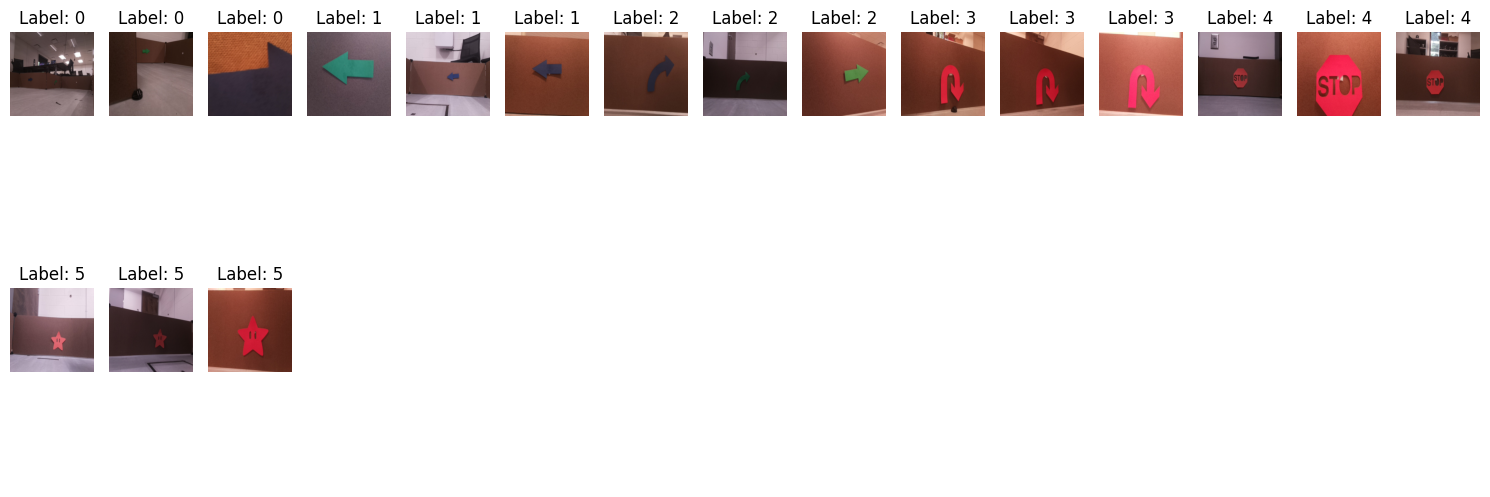

In [58]:
images_per_label = 3


uniq_labels = np.unique(labels)
num_unique_labels = len(uniq_labels)

total_subplot = images_per_label  * num_unique_labels

num_columns = min(num_unique_labels * images_per_label, 5)
num_rows = (num_unique_labels + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns * images_per_label, figsize = (num_columns*3, 3*num_rows))

subplot_idx = 0

if axes.ndim > 1:
        axes = axes.flatten()

for label in uniq_labels:
    label_indices = np.where(labels == label)[0]

    num_images_to_display = min(len(label_indices), images_per_label)

    for i in range(num_images_to_display):
        image_index  = label_indices[i]
        # print("For label", label," idx is ", idx)
        # print("First idx is", (idx[0])[0])
        # print("Image shape for image ",(idx[0])[0], "is ",images[idx[0][0]].shape)
        if subplot_idx < len(axes):
            ax = axes[subplot_idx]
            ax.imshow(images[image_index])
            ax.axis('off')
            ax.set_title(f"Label: {label}")
            subplot_idx += 1
        else:
            print("Ran out of subplots")
            break
while subplot_idx < len(axes):
    axes[subplot_idx].axis('off')
    subplot_idx += 1

plt.tight_layout()
plt.show()

In [59]:
X = images
y = labels

In [60]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=42)

In [ ]:
#Approach 1: Logistic with pixel
from sklearn.linear_model import LogisticRegression
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_flat, y_train)

LogisticRegression(max_iter=1000)

In [66]:
#Get accuracy

from sklearn.metrics import accuracy_score
X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = model.predict(X_test_flat)

# print("Shape of y_test", y_test.shape, "Shape of y_pred", y_pred.shape, "Shape of x_test_flat", X_test_flat.shape, "Shape for x_train_flat", X_test_flat.shape)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.5116279069767442
